In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick

# Visualizing Loans Awarded by Kiva

In this project I'll visualize insights using a dataset from <a href = "https://www.kaggle.com/fkosmowski/kivadhsv1" target = "_blank">Kaggle</a>. The dataset contains information about loans awarded by the non-profit <a href = "https://www.kiva.org/" target = "_blank">Kiva</a>. 

Using Seaborn, I'll explore the average loan amount by country using aggregated bar charts. I'll also visualize the distribution of loan amounts by project type and gender using box plots and violin plots.


## Part One: Reading in the Data
We load **kiva_data.csv** into a DataFrame called `df`. Then, quickly inspect the DataFrame using `.head()`.

In [3]:
df = pd.read_csv('kiva_data.csv')
df.head()

,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female


## Part 2: Examine The Data

If you would like, you can examine the raw CSV file on your local machine. You can find **kiva_data.csv** in the project download folder.

### Overview of the dataset:

Each entry (row) in the dataset represents a loan that Kiva awarded to a particular project. The `loan_amount` column shows the amount (in U.S. dollars) awarded to the project. The `activity` column has the category type that the project falls under. The `country` column is the country where the project is located. The `gender` column represents the gender of the primary person who applied for the loan. 


In [5]:
df.head(25)

,loan_amount,activity,country,gender
0,625,Food Production/Sales,Pakistan,female
1,250,Food Production/Sales,Pakistan,female
2,400,Food Production/Sales,Pakistan,female
3,400,Food Production/Sales,Pakistan,female
4,500,Food Production/Sales,Pakistan,female
5,500,Food Production/Sales,Pakistan,female
6,400,Food Production/Sales,Pakistan,female
7,500,Food Production/Sales,Pakistan,female
8,400,Food Production/Sales,Pakistan,female
9,450,Food Production/Sales,Pakistan,female


## Part 3: Plotting Data With Bar Charts

We will create a bar plot using Seaborn to visualize the average size of Kiva loans given to projects, by country.

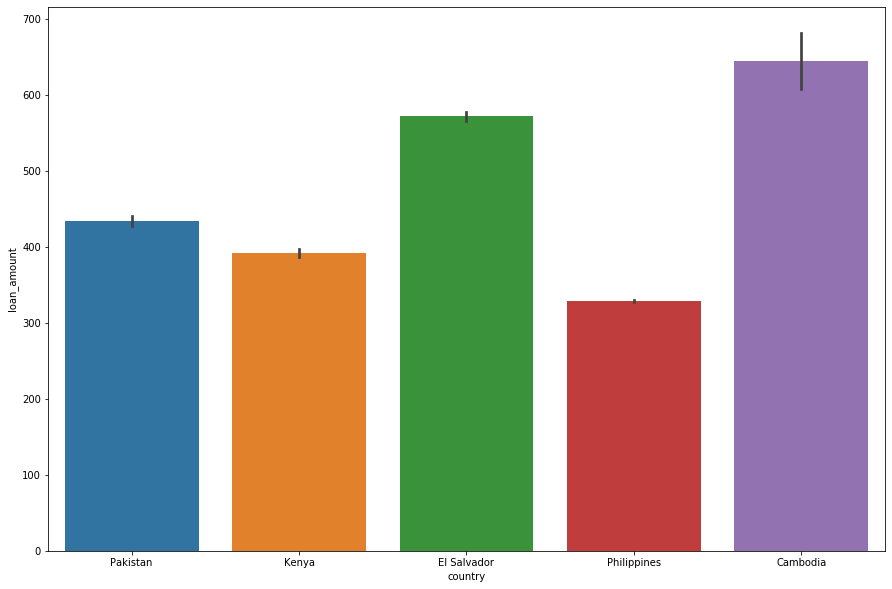

In [4]:
# Creates the figure, note: you're only using this syntax so that you can modify the y-axis ticks later
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(data=df, x ='country', y='loan_amount')

### Adding `$` units

We can use the following code to so that the `loan_amount` ticks on the y-axis begin with a `$` (units of USD). 

```python
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
```

Running the code in the cell below we notice the changes and see the `$` in action.

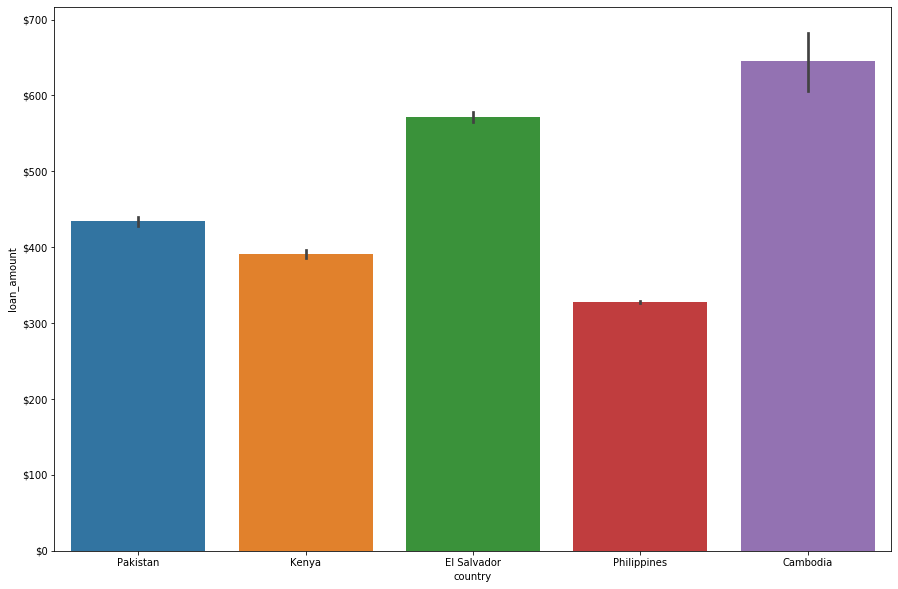

In [6]:
# Creates the figure
f, ax = plt.subplots(figsize=(15, 10))

# Plot the data
sns.barplot(data=df, x="country", y = "loan_amount")

# Use part of the code above to format the y-axis ticks below this line
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)



## Part 4: Adding Granularity to Bar Chart

We can visualize even more data on one bar plot by visualizing the loan amount by country, and "nesting" by gender. Adding the `hue` parameter to the `sns.barplot()` we get a different visualization and can answer more questions regarding the different loan amounts and how they are spread accross by gender.  

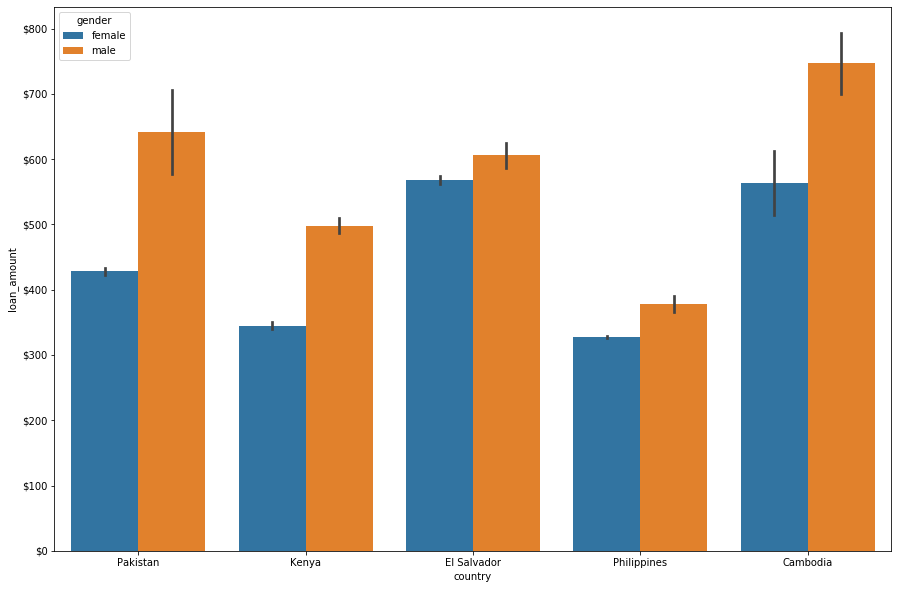

In [7]:
# Creates the figure, you're only using this syntax so you can modify the y-axis ticks below
f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x="country", y="loan_amount",hue='gender')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Questions

-  On average, do female or male recipients receive larger loans from Kiva?
-  Which country has the *least* disparity in loan amounts awarded by gender?
- Based on the data, what kind of recommendations can you make to Kiva about the loans they give?

# Answers

1. Based on the barplot of above, it reasonable to conclude that male recipients receieve larger loans from Kiva across all countries. 

2. The country with the least disparity in the loan amounts awarded by gender is El Salvador.

3. I would recommend Kiva try to minimize the disparity between the loan amount amongst the two genders by offering higher loans to women. 

# Part 5: Styling


Although not completely necessary, we can set different color palette for our previous bar chart using `sns.set_palette()`. This can make our data easier to ingest and clearer for people viewing said data. We can use any of the Color Brewer qualitative color palettes:

- Set1
- Set2
- Set3
- Pastel1
- Pastel2
- Dark2
- Accent

You can read more about <a href = "https://seaborn.pydata.org/tutorial/color_palettes.html#qualitative-color-palettes" target = "_blank">qualitative color palettes in the Seaborn documentation.</a>


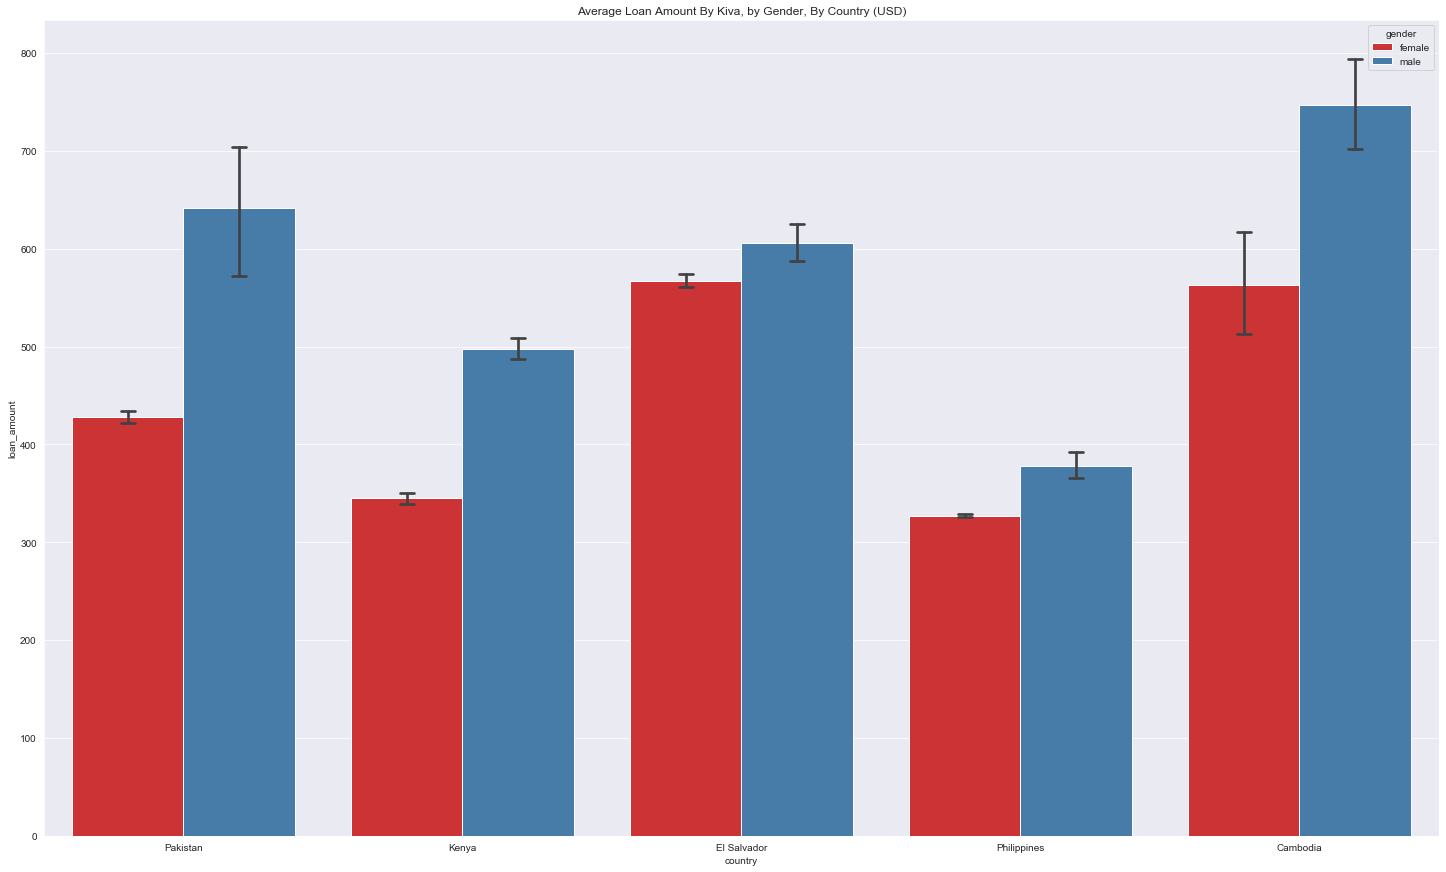

In [10]:
# Set color palette
sns.set_palette('Set1')

# Set style
sns.set_style('darkgrid')

# Create figure and axes (no need to use the previous syntax, as the y-label ticks aren't going to be formatted)
plt.figure(figsize=(25, 15))

# Add a title
plt.title('Average Loan Amount By Kiva, by Gender, By Country (USD)')

# Use Seaborn to create the bar plot

sns.barplot(data=df, x="country", y="loan_amount",hue='gender', capsize = .05)

plt.show()

## Part 5: Box Plots With Kiva Data

So far we have visualized the average size of loans by country using bar charts; now we are going to make a box plot to compare the distribution of loans by country.

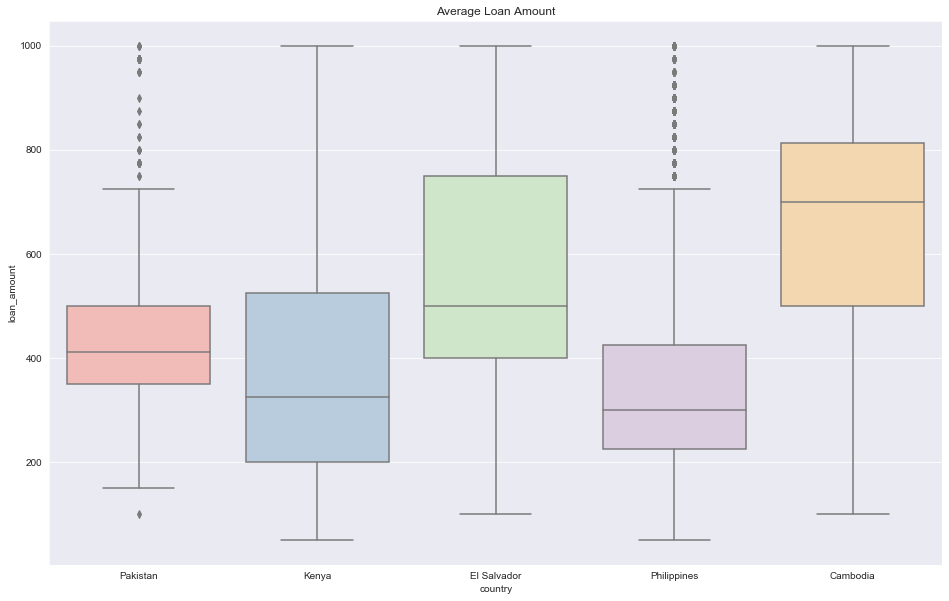

In [17]:
f, ax = plt.subplots(figsize=(16, 10))

sns.boxplot(data=df, x="country", y="loan_amount")

# Set color palette
sns.set_palette('Pastel1')

# Set style
sns.set_style('darkgrid')


# Add a title
ax.set_title('Average Loan Amount')

plt.show()

# Questions

- Which country's box has the widest distribution?
- In which country would you be most likely to receive the largest loan amount?

# Answers

- The kenya box plot seems to have the largest distribution. 
- Cambodia is the country where you would most likely receive the max loan amount.

# Part 6: Box Plot by Activity

Instead of visualizing the loan amount by *country*, we want to use `sns.boxplot()` to plot the loan amount by *activity*.

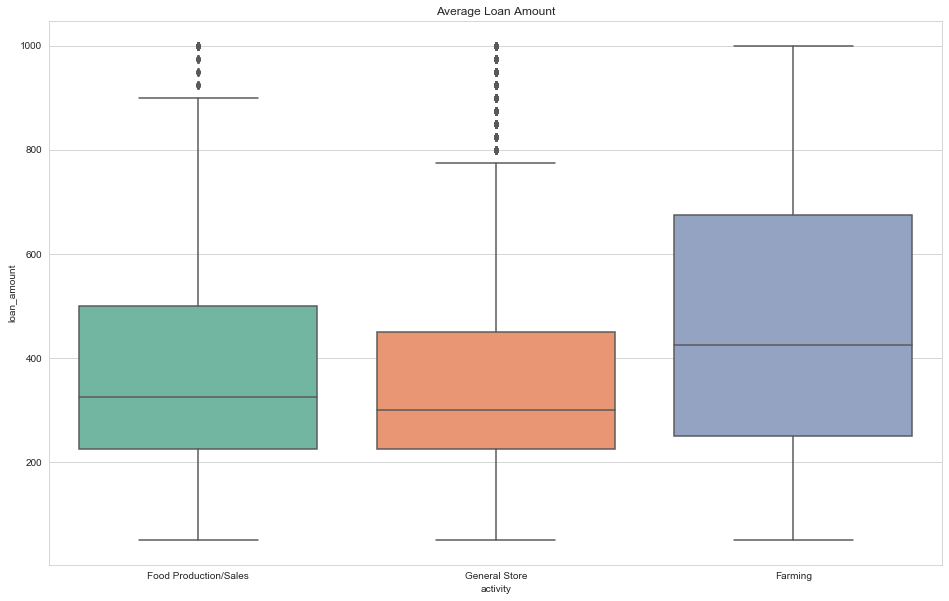

In [21]:
f, ax = plt.subplots(figsize=(16, 10))

sns.boxplot(data=df, x="activity", y="loan_amount")

# Set color palette
sns.set_palette('Set2')

# Set style
sns.set_style('whitegrid')

# Add a title
ax.set_title('Average Loan Amount')

plt.show()


# Questions
- What does this visualization reveal that previous ones did not?

# Answers 
- The loans are distributed across three categories with most of the money being lent to the Farming industry. In second, we have Food/Production and sales. Lastly, less money is lent to the activity "General Store". Moreover, we can see that farming has the largest distribution.  

# Part 7: Violin Plots

We can use nearly identical syntax (as we have used for box plots) to create violin plots. Suppose we wanted to change the code in the cell above so that the data is plotted as a violin plot instead of a barplot. This will show us a more accurate representation of the shape distribution of our data that a box plot cannot. 

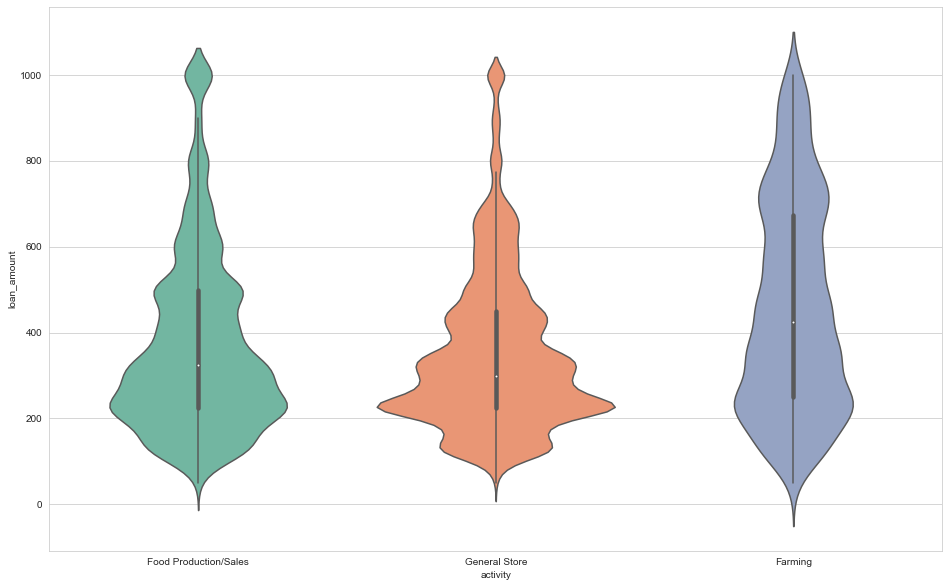

In [22]:
f, ax = plt.subplots(figsize=(16,10))

sns.violinplot(data=df, x="activity", y="loan_amount")

plt.show()

### Create a violin plot that visualizes the distribution of loan amount by country.
Previously, we created a violin plot and plotted the data by _activity_. This time, we create a violin plot that plots the data by _country_. 

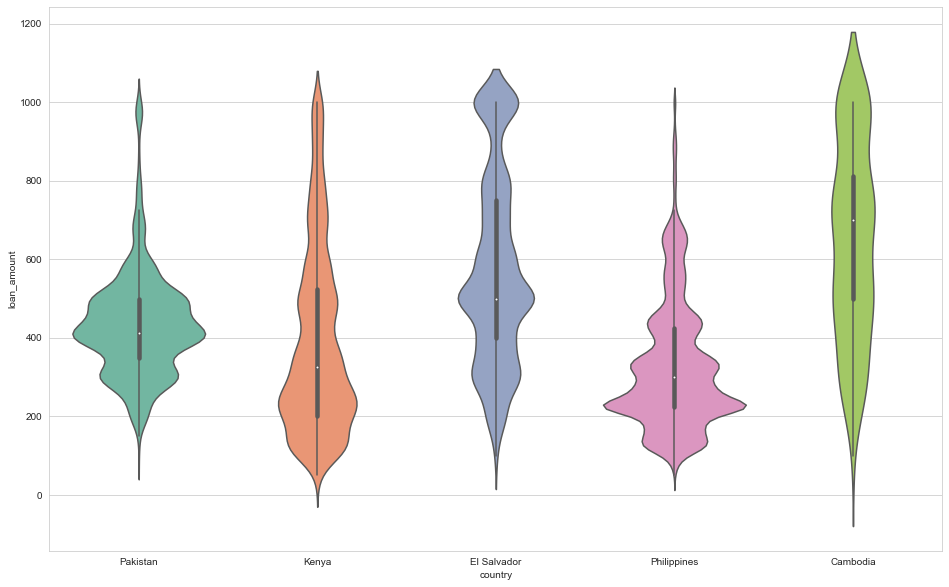

In [23]:
f, ax = plt.subplots(figsize=(16,10))

sns.violinplot(data=df, x="country", y="loan_amount")

plt.show()

## Split Violin Plots

Using the `hue` and `split` parameters with `sns.violinplot()` we can visualize the distribution of loan amount by country, split by gender. 


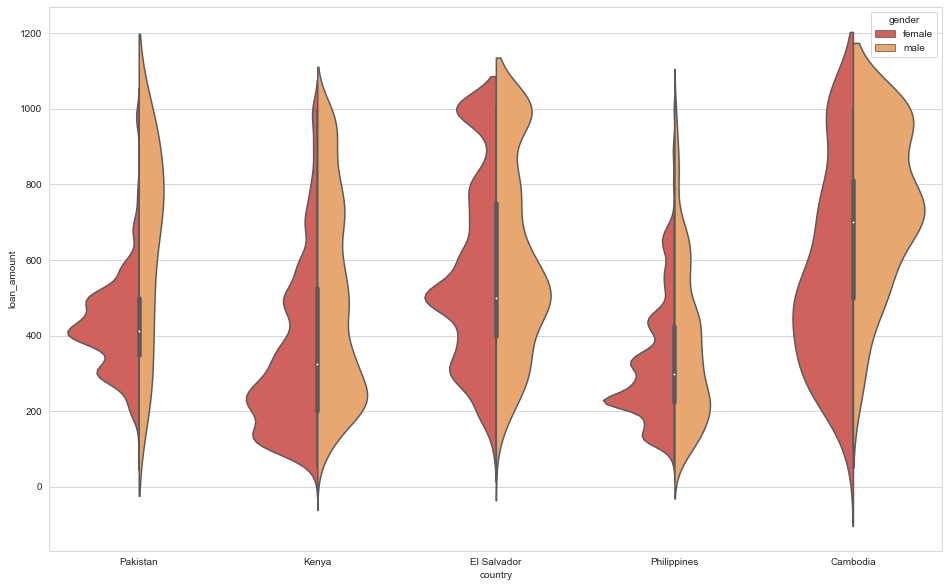

In [24]:
# Some styling (feel free to modify)
sns.set_palette("Spectral")
f, ax = plt.subplots(figsize=(16,10))

sns.violinplot(data=df, x="country", y="loan_amount",hue='gender', split = True)

plt.show()

# Question
- What does this visualization reveal about the distribution of loan amounts within countries by gender?
# Answer

 - In Pakistan, the average loan amount received by women is much less than the average loan amount received by men.
The same can be said for Cambodia (more or less).
In El Salvador, there is a fairly equal distribution of loans (total number of loans) between genders, as well as
similar median loan amounts (on average).